# SVM

In [0]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn import metrics
from yellowbrick.contrib.classifier import DecisionViz

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [0]:
### Datasets:

df = pd.read_csv('../occupancy_data/training_with_working_hours.csv')
df_test = pd.read_csv('../occupancy_data/test_with_working_hours.csv')

df = df.drop('Unnamed: 0', 1)
df_test = df_test.drop('Unnamed: 0', 1)

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [0]:
from sklearn.preprocessing import StandardScaler

In [0]:
#standardising the data 
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
from sklearn.decomposition import PCA

In [0]:
pca = PCA(2)

In [0]:
X_train_pca = pca.fit_transform(X_train_scaled)

In [0]:
X_test_pca = pca.transform(X_test_scaled)

## Non-linear SVM

In [0]:
from sklearn.svm import SVC
from scipy.stats import expon

In [0]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6),
              'gamma': expon(scale=.1),
             }

Randomized search with:
- 3-fold cross-validation
- n_iter = 10

In [0]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 10)

In [0]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=10, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c45828>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c64ef0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9834067050457163
F1-score [0.98937554 0.96213292]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.96      0.96      1302

    accuracy                           0.98      5906
   macro avg       0.98      0.97      0.98      5906
weighted avg       0.98      0.98      0.98      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

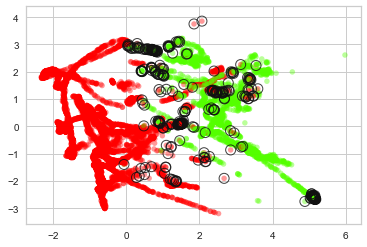

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.8)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=9.701901910793984, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=1,
    gamma=0.018436012736795536, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9351506942092787
F1-score [0.95869729 0.84915321]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4604
           1       0.87      0.83      0.85      1302

    accuracy                           0.94      5906
   macro avg       0.91      0.90      0.90      5906
weighted avg       0.93      0.94      0.93      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


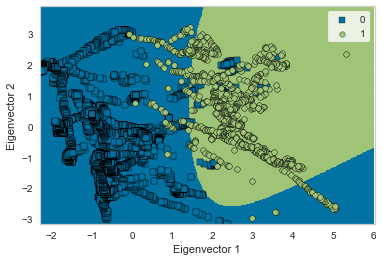

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 30

In [0]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 30)

In [0]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=30, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c45828>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c64ef0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9886556044700304
F1-score [0.99270867 0.97445673]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

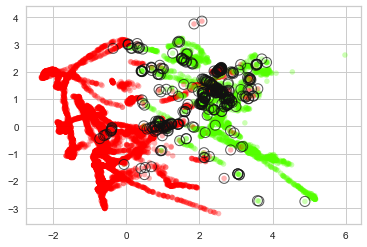

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.3, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.7)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=8.134839198184352, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.0040529984567889135, kernel='rbf', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9600406366407044
F1-score [0.97416813 0.91180867]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.89      0.94      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.93      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


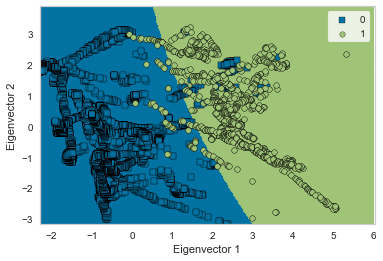

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 3-fold cross-validation
- n_iter = 70

In [0]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 3, n_iter = 70)

In [0]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=3, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c45828>,
                                        'degree': array([1, 2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c19c64ef0>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
     

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260387 0.97402597]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

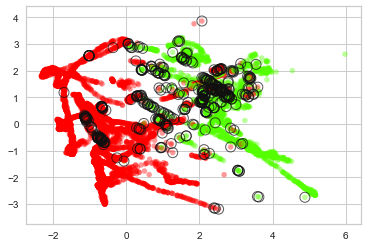

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha =0.7)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=87.84200252701375, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2,
    gamma=0.010199188655033596, kernel='poly', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9409075516423976
F1-score [0.96255767 0.85989562]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4604
           1       0.90      0.82      0.86      1302

    accuracy                           0.94      5906
   macro avg       0.93      0.90      0.91      5906
weighted avg       0.94      0.94      0.94      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


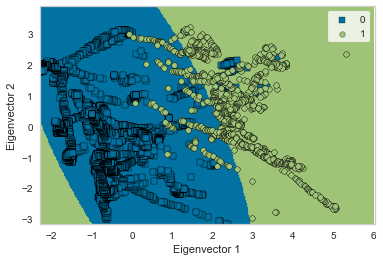

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Randomized search with:
- 5-fold cross-validation
- n_iter = 70

In [0]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 70)

In [0]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2d57f0>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c3c2d5eb8>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
        

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9886556044700304
F1-score [0.99270709 0.97447619]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

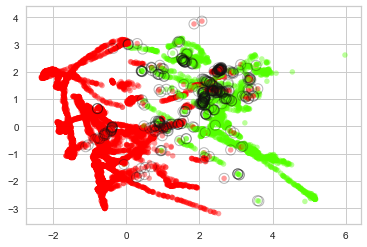

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.3)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=6.871565411679849, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=5,
    gamma=0.009248625199560483, kernel='sigmoid', max_iter=-1,
    probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9607179139857772
F1-score [0.97466696 0.91258478]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.90      0.93      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


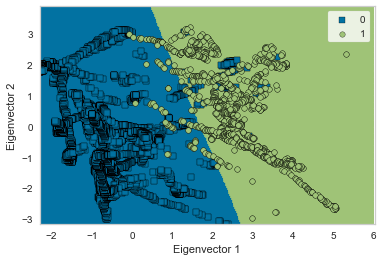

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

In [0]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6),
              'gamma': expon(scale=.1),
             }

Randomized search with:
- 10-fold cross-validation
- n_iter = 70

In [0]:
svm = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 10, n_iter = 70)

In [0]:
svm.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=10, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=70, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c1a2e0ac8>,
                                        'degree': array([2, 3, 4, 5]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c49d03ac8>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
       

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9911953945140535
F1-score [0.99432933 0.98031794]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      0.99      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
svm.best_estimator_

SVC(C=125.95167801745089, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=4,
    gamma=0.22799976875073474, kernel='rbf', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

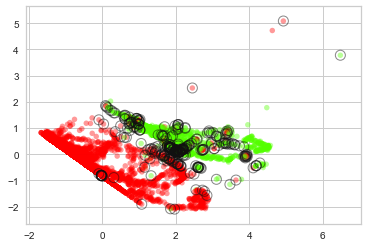

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(support_vectors_pca[:, 0], support_vectors_pca[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k', alpha = 0.5)
plt.show()

Using the best svm originated by Randomized Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=125.95167801745089, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=4,
    gamma=0.22799976875073474, kernel='rbf', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9911953945140535
F1-score [0.99432933 0.98031794]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      0.99      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


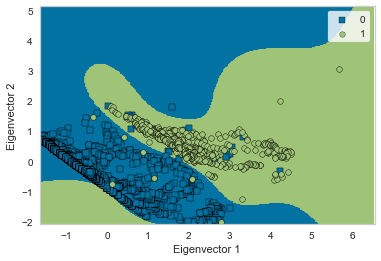

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

## Non-linear SVM on dataset with 2 of the original dimensions

The two dimensions have been selected that resulted the most important in dt classification: Temperature and Light

In [0]:
df = df[['Temperature','Light','Occupancy']]
df_test = df_test[['Temperature','Light','Occupancy']]

In [0]:
# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes = [attribute for attribute in df.columns if attribute != 'Occupancy']
X_train = df[attributes].to_numpy()
y_train = df['Occupancy'].values

# prepping training for methods requiring Numpy arrays 
# and separation b/ independent and target variables (i.e. X and y):

attributes_test = [attribute for attribute in df_test.columns if attribute != 'Occupancy']
X_test = df_test[attributes].to_numpy()
y_test = df_test['Occupancy'].values

In [0]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [0]:
parameters = {'C': expon(scale=100),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,5),
              'gamma': expon(scale=.1),
             }

In [0]:
svm_dt = RandomizedSearchCV (estimator = SVC(random_state=1), param_distributions = parameters, cv = 5, n_iter = 20)  

In [0]:
svm_dt.fit(X_train_scaled, y_train)

RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                                 class_weight=None, coef0=0.0,
                                 decision_function_shape='ovr', degree=3,
                                 gamma='scale', kernel='rbf', max_iter=-1,
                                 probability=False, random_state=1,
                                 shrinking=True, tol=0.001, verbose=False),
                   iid='deprecated', n_iter=20, n_jobs=None,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c42ccf518>,
                                        'degree': array([2, 3, 4]),
                                        'gamma': <scipy.stats._distn_infrastructure.rv_frozen object at 0x1c42d4c198>,
                                        'kernel': ['rbf', 'sigmoid', 'poly']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
           

In [0]:
# again, this is just a replica of the above cell I use to avoid doing the Randomized Search again
svm_dt = svm_dt.best_estimator_

In [0]:
svm_dt.fit(X_train_scaled, y_train)

SVC(C=50.59941802482537, break_ties=False, cache_size=200, class_weight=None,
    coef0=0.0, decision_function_shape='ovr', degree=2,
    gamma=0.3522695230104991, kernel='rbf', max_iter=-1, probability=False,
    random_state=1, shrinking=True, tol=0.001, verbose=False)

In [0]:
y_pred = svm_dt.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9911953945140535
F1-score [0.99432933 0.98031794]
              precision    recall  f1-score   support

           0       1.00      0.99      0.99      4604
           1       0.97      0.99      0.98      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.99      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
svm_dt.support_vectors_

array([[ 2.11189686e+00, -5.93243427e-01],
       [ 6.34871760e-01, -5.93243427e-01],
       [-1.12101653e-01,  1.52106268e+00],
       [-1.12101653e-01,  1.50948197e+00],
       [-1.12101653e-01,  1.50948197e+00],
       [ 1.24163657e+00,  1.68484695e+00],
       [ 1.19328878e+00,  1.73447855e+00],
       [ 1.82181009e+00,  2.04343525e+00],
       [ 1.82181009e+00,  2.08189974e+00],
       [ 1.79763620e+00,  2.40822750e+00],
       [ 1.82181009e+00,  2.37100380e+00],
       [ 1.82181009e+00,  2.02730498e+00],
       [ 1.82181009e+00,  2.06535587e+00],
       [ 1.79763620e+00,  2.05336157e+00],
       [ 1.78957823e+00,  2.00745234e+00],
       [ 1.97329985e+00,  2.76185264e+00],
       [ 2.00553171e+00,  2.29779719e+00],
       [ 2.00553171e+00,  2.47771174e+00],
       [ 2.00553171e+00,  2.30772351e+00],
       [ 1.42535819e+00,  1.90570756e+00],
       [ 1.40360168e+00,  2.22334980e+00],
       [ 1.42535819e+00,  2.23203533e+00],
       [ 1.42535819e+00,  1.84201368e+00],
       [ 1.

In [0]:
sup_vecs_original = scaler.inverse_transform(svm_dt.support_vectors_)

In [0]:
sup_vecs_original

array([[  23.04999921,    4.57790476],
       [  21.5123194 ,    4.57790476],
       [  20.73467118,  435.0370018 ],
       [  20.73467118,  432.67924462],
       [  20.73467118,  432.67924462],
       [  22.14400129,  468.38242481],
       [  22.09366807,  478.48709845],
       [  22.7479999 ,  541.38869186],
       [  22.7479999 ,  549.21981393],
       [  22.72283329,  615.65804311],
       [  22.7479999 ,  608.07953788],
       [  22.7479999 ,  538.10467293],
       [  22.7479999 ,  545.85158938],
       [  22.72283329,  543.40962659],
       [  22.71444442,  534.06280347],
       [  22.90571065,  687.65384279],
       [  22.93926613,  593.17514426],
       [  22.93926613,  629.8045862 ],
       [  22.93926613,  595.19607899],
       [  22.33526751,  513.34822251],
       [  22.31261757,  578.0181338 ],
       [  22.33526751,  579.78645169],
       [  22.33526751,  500.380558  ],
       [  22.33526751,  497.01233346],
       [  22.33526751,  509.81158673],
       [  22.33526751,  5

In [0]:
X_train_scaled_rev = scaler.inverse_transform(X_train_scaled)
X_test_scaled_rev = scaler.inverse_transform(X_test_scaled)

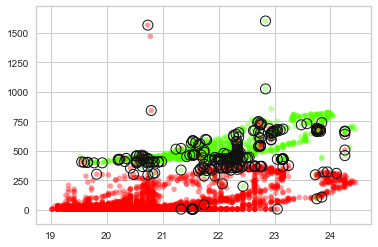

In [0]:
plt.scatter(X_train_scaled_rev[:, 0], X_train_scaled_rev[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.4, s=30)
plt.scatter(sup_vecs_original[:, 0], sup_vecs_original[:, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

PER MARTA: GRAFICO QUA SOTTO (MA VEDI ERRORE SEGNALATO NEL COMMENTO)

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


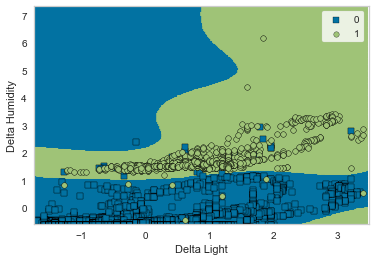

In [0]:
## N.B. I nomi degli attributi qui sono sbagliati: non sono Delta ma gli originali (quindi Light e Humidity)
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train_scaled, y_train)
viz.draw(X_test_scaled, y_test)
viz.show()

/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


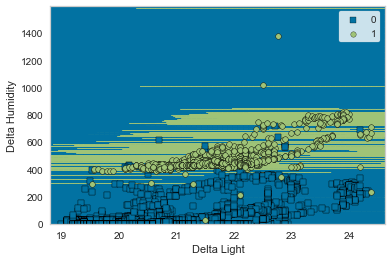

In [0]:
viz = DecisionViz(
    svm_dt,
    features=['Delta Light', 'Delta Humidity']
)
viz.fit(X_train, y_train)
viz.draw(X_test, y_test)
viz.show()

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

# --------------------------------------------------------------------------------------------

Can ignore what follows (was only modifying some of the parameters and not doing it the optimal way, anyway).
Or maybe use some of it for report.

In [0]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(1,6)
             }

Grid search with 3-fold cross-validation:

In [0]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 3)

In [0]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260387 0.97402597]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

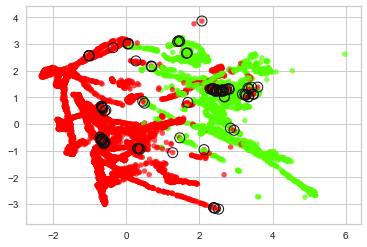

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.941246190314934
F1-score [0.96276425 0.86081027]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4604
           1       0.90      0.82      0.86      1302

    accuracy                           0.94      5906
   macro avg       0.93      0.90      0.91      5906
weighted avg       0.94      0.94      0.94      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


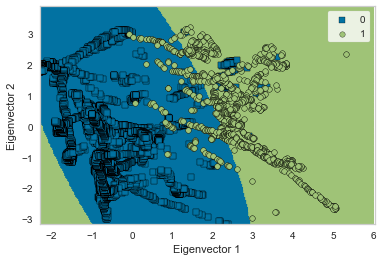

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 5-fold cross-validation:

In [0]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [0]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9886556044700304
F1-score [0.99270867 0.97445673]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

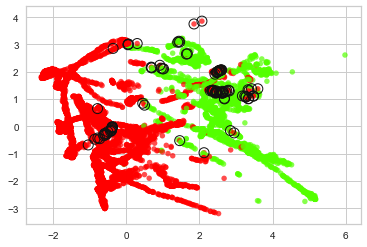

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=0.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9605485946495089
F1-score [0.97456054 0.9121749 ]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.90      0.93      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


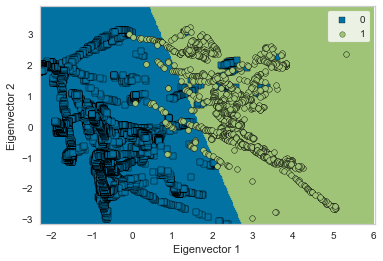

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [0]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [0]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([1, 2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260065 0.9740656 ]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

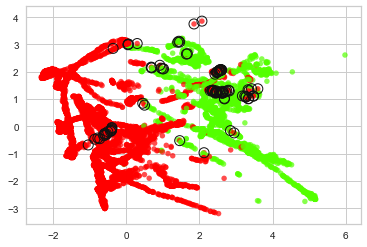

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=4.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=1, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9607179139857772
F1-score [0.97467249 0.91251885]
              precision    recall  f1-score   support

           0       0.98      0.97      0.97      4604
           1       0.90      0.93      0.91      1302

    accuracy                           0.96      5906
   macro avg       0.94      0.95      0.94      5906
weighted avg       0.96      0.96      0.96      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


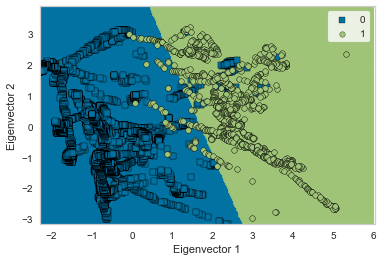

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

<b>Interestingly enough, with 5- and 10- fold cross validation the best results are yielded by a kernel function equivalent to a simple linear function (poly with degree=1). Will now rerun 5- and 10-fold cross-validation taking out the possibility of degree=1.</b>

Grid search with 5-fold cross-validation:

In [0]:
parameters = {'C': np.arange(0.5, 5.5, 0.5),
              'kernel': ['rbf', 'sigmoid', 'poly'],
              'degree': np.arange(2,6)
             }

In [0]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 5)

In [0]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260387 0.97402597]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

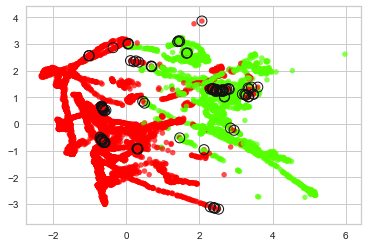

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=3.5, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9414155096512021
F1-score [0.96286757 0.86126704]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4604
           1       0.90      0.82      0.86      1302

    accuracy                           0.94      5906
   macro avg       0.93      0.90      0.91      5906
weighted avg       0.94      0.94      0.94      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


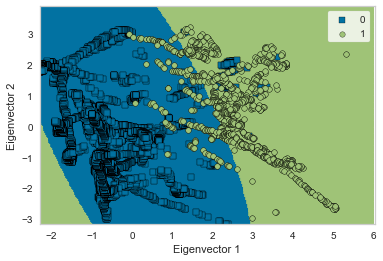

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

Grid search with 10-fold cross-validation:

In [0]:
svm = GridSearchCV (estimator = SVC(random_state=1), param_grid = parameters, cv = 10)

In [0]:
svm.fit(X_train_scaled, y_train)

GridSearchCV(cv=10, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=1, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. ]),
                         'degree': array([2, 3, 4, 5]),
                         'kernel': ['rbf', 'sigmoid', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [0]:
y_pred = svm.predict(X_test_scaled)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9884862851337622
F1-score [0.99260387 0.97402597]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      4604
           1       0.97      0.98      0.97      1302

    accuracy                           0.99      5906
   macro avg       0.98      0.99      0.98      5906
weighted avg       0.99      0.99      0.99      5906



In [0]:
support_vectors = svm.best_estimator_.support_vectors_

In [0]:
support_vectors_pca = pca.transform(support_vectors)

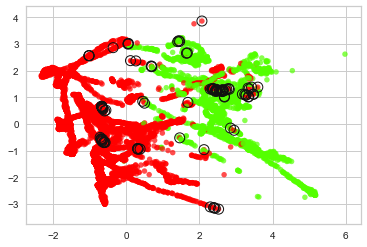

In [0]:
plt.scatter(X_train_pca[:, 0], X_train_pca[:, 1], c=y_train, cmap=plt.cm.prism, edgecolor='none', alpha=0.7, s=30)
plt.scatter(support_vectors_pca[:100, 0], support_vectors_pca[:100, 1], s=100,
                linewidth=1, facecolors='none', edgecolors='k')
plt.show()

Using the best svm originated by Grid Search to plot decision boundary onto PCA'd dataset:

In [0]:
svm = svm.best_estimator_

In [0]:
svm.fit(X_train_pca, y_train)

SVC(C=2.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=2, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=1, shrinking=True, tol=0.001,
    verbose=False)

In [0]:
y_pred = svm.predict(X_test_pca)

In [0]:
print('Accuracy %s' % metrics.accuracy_score(y_test, y_pred))
print('F1-score %s' % metrics.f1_score(y_test, y_pred, average=None))
print(metrics.classification_report(y_test, y_pred))

Accuracy 0.9414155096512021
F1-score [0.96286757 0.86126704]
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4604
           1       0.90      0.82      0.86      1302

    accuracy                           0.94      5906
   macro avg       0.93      0.90      0.91      5906
weighted avg       0.94      0.94      0.94      5906



/Applications/anaconda3/lib/python3.7/site-packages/sklearn/base.py:197: FutureWarning: From version 0.24, get_params will raise an AttributeError if a parameter cannot be retrieved as an instance attribute. Previously it would return None.
  FutureWarning)


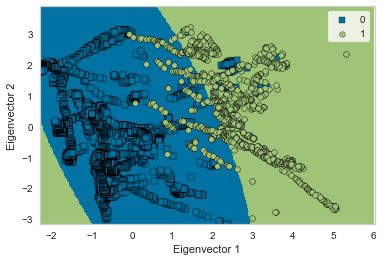

In [0]:
viz = DecisionViz(
    svm,
    features=['Eigenvector 1', 'Eigenvector 2']
)
viz.fit(X_train_pca, y_train)
viz.draw(X_test_pca, y_test)
viz.show()

NameError: name 'X_test' is not defined